In [1]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import datasets
from sklearn.model_selection import cross_val_score


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

import scipy.sparse
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression as lm
from scipy import stats

import gensim
import nltk
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize, punkt
from gensim.models import KeyedVectors

import matplotlib.collections as plt1
import matplotlib.pyplot as plt2
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.lines import Line2D
import seaborn as sns

import pandas as pd
pd.set_option('display.max_columns', 50)

import pickle
import time
import re
import csv
import math
import pickle
import time
import spacy

nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/kno5cac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
#data frame with only labeled abstracts
df_lab = pd.read_csv("/home/kno5cac/git/publicrd/data/prd/Digital_abstract_labelled/DEC-2022-labelled_abstracts.csv")

#data frame with all of the abstracts
df = pd.read_pickle("/home/kno5cac/git/publicrd/data/prd/Paper/FR_meta_and_final_tokens_23DEC21.pkl")

In [3]:
# Reset the index and create a variable index to link with PROJECT_ID
df.reset_index(inplace = True, drop = True)
df['index'] = df.index
df.head()

,PROJECT_ID,ABSTRACT,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens,index
0,89996,"This is a project to explore Game-based, Metap...",Achievement; analog; base; Cognitive Science; ...,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,NSF,NSF,NaN,0814512,9/15/2008,8/31/2012,"REESE, DEBBIE D","CARTER, BEVERLY; WOOD, CHARLES; HITT, BEN",01,068719400,WHEELING JESUIT UNIVERSITY,WHEELING,WV,26003-6243,UNITED STATES,NaN,NaN,47.076,2008,1999467.0,NaN,1,1,1999467.0,1,project explore game base metaphor enhanced ga...,0
1,89997,Institution: Franklin Institute Science Museum...,Active Learning; Child; Computer software; des...,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,NSF,NSF,NaN,0741659,9/15/2008,8/31/2012,"SNYDER, STEVEN","ELINICH, KAREN; YOON, SUSAN",02,001741859,FRANKLIN INSTITUTE,PHILADELPHIA,PA,19103-1115,UNITED STATES,NaN,NaN,47.076,2008,1799699.0,NaN,1,1,1799699.0,1,institution franklin institute science museum ...,1
2,89998,Through programs (including small group conver...,Address; Age; Birth; Brain; Caregivers; Child;...,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,NSF,NSF,NaN,0813522,9/15/2008,8/31/2011,"FINK, LAURIE KLEINBAUM","CADIGAN, KAREN; ELLENBOGEN, KIRSTEN",04,061451670,SCIENCE MUSEUM OF MINNESOTA,SAINT PAUL,MN,55102-1202,UNITED STATES,NaN,NaN,47.076,2008,1505858.0,NaN,1,1,1505858.0,1,program include small group conversation citiz...,2
3,89999,In partnership with the American Chemical Soci...,Advanced Development; American; Chemicals; Che...,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,NSF,NSF,NaN,0838627,8/1/2008,12/31/2010,"JOST, JOHN W","MILLER, BRADLEY; BOWMAN, KATHERINE",04,009059242,INTERNATIONAL UNION OF PURE AND APPLIED CHEMISTRY,DURHAM,NC,27709-3757,UNITED STATES,NaN,NaN,47.049,2008,51000.0,NaN,1,1,51000.0,1,partnership american chemical society acs nati...,3
4,90001,The Center for Molecular Interfacing (CMI) wil...,Address; Architecture; Carbon Nanotubes; Catal...,CCI PHASE I: CENTER FOR MOLECULAR INTERFACING,NSF,NSF,NaN,0847926,10/1/2008,9/30/2011,"ABRUNA, HECTOR D",NaN,22,872612445,CORNELL UNIVERSITY ITHACA,ITHACA,NY,14850-2820,UNITED STATES,NaN,NaN,47.049,2008,1519821.0,NaN,1,1,1519821.0,1,center molecular interfacing cmi enable integr...,4


In [4]:
df_lab = df_lab[['PROJECT_ID','ABSTRACT','Is it related to Big-Data','label']]
df_lab

,PROJECT_ID,ABSTRACT,Is it related to Big-Data,label
0,950056,ï»¿ DESCRIPTION (provided by applicant): Adv...,1,Big-data
1,1178172,Project Summary/AbstractThe establishment of t...,1,Big-data
2,163037,DESCRIPTION (provided by applicant): The long-...,0,Non Big-data
3,880197,DESCRIPTION (provided by applicant): The most ...,0,Non Big-data
4,887331,Transsphenoidal surgery (TSS) is the best trea...,0,Non Big-data
...,...,...,...,...
1595,1290459,Extracting knowledge from data using statistic...,1,Big-data
1596,1290525,As the amount and variety of data available on...,1,Big-data
1597,1292937,"By 2030, nearly 146 million connected vehicles...",1,Big-data
1598,1293276,High-performance computing (HPC) has enabled s...,1,Big-data


In [5]:
# merge with the labelled data using PROJECT_ID.
df['PROJECT_ID'] = pd.to_numeric(df['PROJECT_ID'])
df_merge = df.merge(df_lab[['PROJECT_ID','Is it related to Big-Data','label']], how='left', on='PROJECT_ID')
len(df_merge)

1143869

In [6]:
df_merge

,PROJECT_ID,ABSTRACT,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens,index,Is it related to Big-Data,label
0,89996,"This is a project to explore Game-based, Metap...",Achievement; analog; base; Cognitive Science; ...,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,NSF,NSF,NaN,0814512,9/15/2008,8/31/2012,"REESE, DEBBIE D","CARTER, BEVERLY; WOOD, CHARLES; HITT, BEN",01,068719400,WHEELING JESUIT UNIVERSITY,WHEELING,WV,26003-6243,UNITED STATES,NaN,NaN,47.076,2008,1999467.0,NaN,1,1,1999467.0,1,project explore game base metaphor enhanced ga...,0,NaN,NaN
1,89997,Institution: Franklin Institute Science Museum...,Active Learning; Child; Computer software; des...,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,NSF,NSF,NaN,0741659,9/15/2008,8/31/2012,"SNYDER, STEVEN","ELINICH, KAREN; YOON, SUSAN",02,001741859,FRANKLIN INSTITUTE,PHILADELPHIA,PA,19103-1115,UNITED STATES,NaN,NaN,47.076,2008,1799699.0,NaN,1,1,1799699.0,1,institution franklin institute science museum ...,1,NaN,NaN
2,89998,Through programs (including small group conver...,Address; Age; Birth; Brain; Caregivers; Child;...,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,NSF,NSF,NaN,0813522,9/15/2008,8/31/2011,"FINK, LAURIE KLEINBAUM","CADIGAN, KAREN; ELLENBOGEN, KIRSTEN",04,061451670,SCIENCE MUSEUM OF MINNESOTA,SAINT PAUL,MN,55102-1202,UNITED STATES,NaN,NaN,47.076,2008,1505858.0,NaN,1,1,1505858.0,1,program include small group conversation citiz...,2,NaN,NaN
3,89999,In partnership with the American Chemical Soci...,Advanced Development; American; Chemicals; Che...,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,NSF,NSF,NaN,0838627,8/1/2008,12/31/2010,"JOST, JOHN W","MILLER, BRADLEY; BOWMAN, KATHERINE",04,009059242,INTERNATIONAL UNION OF PURE AND APPLIED CHEMISTRY,DURHAM,NC,27709-3757,UNITED STATES,NaN,NaN,47.049,2008,51000.0,NaN,1,1,51000.0,1,partnership american chemical society acs nati...,3,NaN,NaN
4,90001,The Center for Molecular Interfacing (CMI) wil...,Address; Architecture; Carbon Nanotubes; Catal...,CCI PHASE I: CENTER FOR MOLECULAR INTERFACING,NSF,NSF,NaN,0847926,10/1/2008,9/30/2011,"ABRUNA, HECTOR D",NaN,22,872612445,CORNELL UNIVERSITY ITHACA,ITHACA,NY,14850-2820,UNITED STATES,NaN,NaN,47.049,2008,1519821.0,NaN,1,1,1519821.0,1,center molecular interfacing cmi enable integr...,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143864,1294186,Circadian rhythms are fundamental endogenous p...,NaN,Revealing the Palatable Meal-Inducible Circadi...,NSF,NSF,NaN,1931115,5/1/2020 12:00:00 AM,4/30/2025 12:00:00 AM,NaN,NaN,NaN,800771545,UNIVERSITY OF TEXAS SW MED CTR,NaN,NaN,NaN,NaN,NaN,NaN,47.074,2020,700000.0,NaN,1,0,700000.0,1,circadian_rhythm fundamental endogenous proper...,1143864,NaN,NaN
1143865,1294187,Recent research suggests that learning about g...,NaN,Collaborative Research : Improving the teachin...,NSF,NSF,NaN,1956119,7/1/2020 12:00:00 AM,6/30/2025 12:00:00 AM,NaN,NaN,NaN,170230239,UNIVERSITY OF TEXAS AUSTIN,NaN,NaN,NaN,NaN,NaN,NaN,47.076,2020,136238.0,NaN,3,0,672158.0,3,recent research suggest learn genetic high sch...,1143865,NaN,NaN
1143866,1294188,The COVID-19 pandemic has caused unprecedented...,NaN,Collaborative Research: RAPID: Maintain Mobili...,NSF,NSF,NaN,2028098,4/15/2020 12:00:00 AM,3/31/2021 12:00:00 AM,NaN,NaN,NaN,003387891,UNIVERSITY OF TENNESSEE KNOXVILLE,NaN,NaN,NaN,NaN,NaN,NaN,47.041,2020,132226.0,NaN,2,0,182205.0,2,covid_19_pandemic cause unprecedented disrupti...,1143866,NaN,NaN
1143867,1294189,Subduction zones – locations where one of the ...,NaN,Collaborative Research: Synthesiz

In [7]:
# Save project ID of labelled data
project_id_lab = list(df_lab['PROJECT_ID'])

# Get the index of labelled abstract
subset_df = df_merge.loc[df_merge['PROJECT_ID'].isin(project_id_lab),['index', 'PROJECT_ID']]
index_lab = list(subset_df['index'])

# 1. Doc2Vec approach

## 1.1. Vectorize, build the training and test sample

In [8]:
# creating dataframe with just abstracts
data = df['ABSTRACT']
indicies = data.index

In [9]:
#tagging and saving data (do not need to run this again - data is saved in tagged_df.csv)
#tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(data)]
#tagged_df = pd.DataFrame(tagged_data)
#tagged_df.to_csv('tagged_df.csv')

In [10]:
#loading tagged_df
tagged_df = pd.read_csv('/home/kno5cac/git/publicrd/data/prd/Doc2Vec/doc2vec_final.csv')

In [11]:
tagged_df = pd.DataFrame(tagged_df)

In [12]:
# Create the Doc2Vec model and train using labelled data (do not need to run this again - model saved in d2v.model)
#model = gensim.models.doc2vec.Doc2Vec(vector_size=100, epochs=100) #min_count=2 - min number of times it shows up
#model.build_vocab(tagged_data)
#model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)
#model.save("d2v.model")

In [13]:
# Load the Doc2Vec model
model = Doc2Vec.load("/home/kno5cac/git/publicrd/data/prd/Doc2Vec/d2v.model")

In [14]:
# create vector of tagged data
vector = []
for i in range(0, len(tagged_df)):
    vectorthis = (model.dv[i]).tolist()
    vector.append(vectorthis)

In [15]:
data = df['ABSTRACT']

In [16]:
# append vectors to matrix
mat = []
for i in vector:
    for x in i:
        mat.append(x)

In [17]:
# initialize training
training = pd.DataFrame(vector)
training

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.982922,2.319988,3.742522,0.944506,-1.694736,-3.728322,0.204749,-1.112957,1.098760,-4.612341,0.733703,-2.214583,-0.259219,-0.214456,0.995408,-1.186774,-0.131439,-1.180803,1.841610,-1.639843,-2.358011,3.413001,3.731894,1.390462,3.263571,...,-1.041995,2.063597,0.650890,-0.009327,-2.202883,-0.411864,-1.595071,-1.730732,-1.397346,-0.712966,1.295766,-1.123551,-0.102224,2.066787,0.765735,4.270835,3.079768,-0.978548,0.275256,0.677612,-2.733896,0.354953,-1.033716,0.140886,-2.464530
1,0.456848,-0.227907,-0.991774,2.260244,-1.303596,-1.987082,-2.183362,1.811930,-0.897663,0.843100,0.932140,-4.361772,-0.521623,0.296213,1.349446,-0.805430,-1.736138,-0.538803,0.459269,-0.474585,-2.454310,1.329033,2.992836,1.203448,0.310803,...,1.549266,-1.570076,-1.332427,-0.770249,1.699491,-0.274130,-5.603177,-1.300055,-0.810193,-2.107439,0.174144,2.185729,-2.083795,2.886135,-0.271330,3.001608,2.179992,3.509960,0.711321,-0.808178,-1.946631,-0.329511,-1.518070,1.803749,-0.085112
2,3.939317,-0.077519,1.721057,-0.717855,-3.445618,-2.466907,-0.437651,3.141626,-3.202489,0.375526,0.532302,-1.165914,-0.406458,0.446012,-1.526703,-0.200713,1.268217,0.085013,-0.847399,0.953084,0.618521,2.339281,-1.306460,0.514830,2.718282,...,0.788696,1.818320,-1.556971,1.819863,1.508475,-1.179790,0.828222,0.005567,-0.094424,-0.004659,-0.880713,-0.720786,1.472627,-1.323683,3.885650,1.376774,-0.988943,0.242667,-1.518137,-0.670374,-1.113849,-0.119800,-4.312647,-0.575666,-0.374445
3,0.261933,2.833923,-1.429265,2.710543,-2.051509,-2.664451,1.328356,0.693114,-2.763685,1.123290,-1.326368,-1.178106,2.254581,2.241744,0.068839,1.155099,1.886543,-2.059903,-1.559700,-0.770142,-0.253473,-0.482159,0.112768,-0.993233,-0.440269,...,-0.095776,0.772124,-0.252873,-0.083401,-1.206205,-0.901444,1.999393,0.931728,-1.386474,-1.996466,-2.597653,-1.525401,-1.121509,0.461437,-0.235091,2.322187,-1.351750,0.528141,-2.293975,-0.394241,-1.240165,0.156464,-0.477509,0.817239,0.814438
4,1.591960,1.018378,-0.159254,1.763578,-1.124414,-0.417599,-1.689906,0.896199,-0.812358,-0.964306,-1.619780,0.353326,2.982134,1.652212,0.084070,-2.297758,-0.385808,-2.790571,2.477949,0.223171,0.887371,1.535304,0.736297,-0.550977,3.002540,...,-0.894851,2.199989,-2.327350,0.552252,0.862642,-0.526882,2.033086,0.602459,0.172678,-1.177264,-2.423429,1.038152,-1.498387,-1.542013,0.237539,-2.691047,-1.320943,1.387134,1.664728,-0.789113,-0.246745,2.204133,-1.852782,-2.572883,2.798885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143864,-0.589433,-2.827645,-0.015131,0.440290,-3.171267,0.226309,-0.993920,2.299028,-1.271716,-2.754301,-1.393994,-2.420811,-1.928915,2.034703,-1.412915,-1.795308,1.567008,-1.223800,1.913204,-2.361304,2.478794,-0.169768,1.931102,0.871608,1.210561,...,1.414410,-1.744653,-1.986873,1.542214,1.333920,-2.133246,0.615134,1.853283,3.042733,1.747994,0.109657,-0.033058,1.117686,-0.712576,-0.404940,-0.404730,2.688170,2.625527,4.112746,-4.826093,2.253988,0.963031,-3.712034,-1.322149,3.365469
1143865,-0.046254,1.644556,-0.228649,-1.154571,-1.796054,-2.439546,-2.409341,-1.295492,1.210209,-3.479094,-2.119251,-1.792609,1.884615,3.665569,0.279281,-0.828874,0.595290,1.931901,1.646654,2.387414,1.235176,0.581897,1.716896,-0.770842,-0.010682,...,-2.751852,-0.275039,-1.069470,-2.049822,4.377855,-4.498168,1.907763,-3.553480,0.761350,-2.552432,-1.076153,-0.385006,0.612397,-0.115043,1.164006,3.233547,2.891143,0.676756,-0.612910,-1.962523,-0.686879,-1.105975,-1.178190,-0.875600,0.905634
1143866,1.649566,2.593250,-2.476415,1.464013,-1.890929,-0.712783,0.072332,0.206794,0.151559,-0.232204,-1.816210,-2.969110,2.040817,-0.778387,-0.554495,2.358896,1.262079,-0.206404,0.290963,-2.154397,-0.643661,2.033018,1.022280,-1.115017,-4.438424,...,0.545

In [18]:
#training model on labeled and whole corpus
trainingnp = training.to_numpy()

In [19]:
project_id_training = pd.read_csv('final_projectid_training.csv')
project_id_testing = pd.read_csv('final_projectid_testing.csv')

In [20]:
# convert to lists
project_id_training = list(project_id_training['0'])
project_id_testing = list(project_id_testing['0'])

In [21]:
df_train = df_merge[df_merge['PROJECT_ID'].isin(project_id_training)]
df_test = df_merge[df_merge['PROJECT_ID'].isin(project_id_testing)]

In [22]:
# Extract those index in the Doc2Vec matrix and compute the X training and Test
X_train_doc2vec = [trainingnp[i] for i in df_train['index']]
X_test_doc2vec = [trainingnp[i] for i in df_test['index']]

In [23]:
# Create Y for training and test using the index order from the sampling
Y_train_doc2vec = [df_merge.loc[df_merge['index']== i,'label'].values.tolist() for i in df_train['index']]
Y_train_doc2vec = sum(Y_train_doc2vec, [])

Y_test_doc2vec = [df_merge.loc[df_merge['index']== i,'label'].values.tolist() for i in df_test['index']]
Y_test_doc2vec = sum(Y_test_doc2vec, [])

## 1.2. KNN classifier

In [24]:
# number of neighbors
k = int(math.sqrt(len(Y_train_doc2vec)))
print('Number of neighbors:', k)

Number of neighbors: 35


In [25]:
# Run KNN
from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier(n_neighbors= k)

# cross-validation with 5 folds
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(classifierKNN,X_train_doc2vec,Y_train_doc2vec, scoring='accuracy', cv=cv)
print(scores)
print("Accuracy: %0.2f.   Standard Deviation: %0.2f" % (scores.mean(), scores.std()))

# train model after cross-validation
classifierKNN.fit(X_train_doc2vec,Y_train_doc2vec)

[0.74609375 0.7734375  0.7421875  0.796875   0.765625  ]
Accuracy: 0.76.   Standard Deviation: 0.02


KNeighborsClassifier(n_neighbors=35)

In [26]:
# Predict the classification
Y_pred_doc2vec = classifierKNN.predict(X_test_doc2vec)

In [27]:
# Classifier performance
from sklearn.metrics import classification_report, confusion_matrix

confusion = confusion_matrix(Y_test_doc2vec, Y_pred_doc2vec)
#print(confusion)
print(classification_report(Y_test_doc2vec, Y_pred_doc2vec))

              precision    recall  f1-score   support

    Big-data       0.86      0.61      0.71       139
Non Big-data       0.76      0.92      0.83       181

    accuracy                           0.79       320
   macro avg       0.81      0.77      0.77       320
weighted avg       0.80      0.79      0.78       320



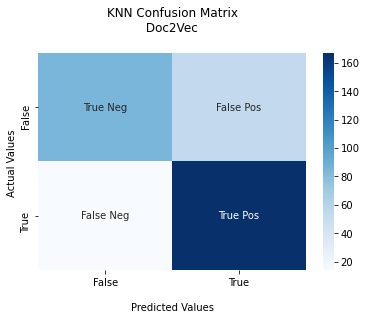

In [28]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues')
ax.set_title('KNN Confusion Matrix\n Doc2Vec \n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt2.savefig('doc2vec_KNN.PNG')
plt2.show()

In [29]:
# Predict the classification for the whole data: use the whole Doc2Vec
Y_doc2vec = classifierKNN.predict(vector)

# The Doc2Vec keep the order from index. Just add the prediction as new variable
df['Prediction_KNN'] = Y_doc2vec
df.head()

,PROJECT_ID,ABSTRACT,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens,index,Prediction_KNN
0,89996,"This is a project to explore Game-based, Metap...",Achievement; analog; base; Cognitive Science; ...,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,NSF,NSF,NaN,0814512,9/15/2008,8/31/2012,"REESE, DEBBIE D","CARTER, BEVERLY; WOOD, CHARLES; HITT, BEN",01,068719400,WHEELING JESUIT UNIVERSITY,WHEELING,WV,26003-6243,UNITED STATES,NaN,NaN,47.076,2008,1999467.0,NaN,1,1,1999467.0,1,project explore game base metaphor enhanced ga...,0,Non Big-data
1,89997,Institution: Franklin Institute Science Museum...,Active Learning; Child; Computer software; des...,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,NSF,NSF,NaN,0741659,9/15/2008,8/31/2012,"SNYDER, STEVEN","ELINICH, KAREN; YOON, SUSAN",02,001741859,FRANKLIN INSTITUTE,PHILADELPHIA,PA,19103-1115,UNITED STATES,NaN,NaN,47.076,2008,1799699.0,NaN,1,1,1799699.0,1,institution franklin institute science museum ...,1,Non Big-data
2,89998,Through programs (including small group conver...,Address; Age; Birth; Brain; Caregivers; Child;...,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,NSF,NSF,NaN,0813522,9/15/2008,8/31/2011,"FINK, LAURIE KLEINBAUM","CADIGAN, KAREN; ELLENBOGEN, KIRSTEN",04,061451670,SCIENCE MUSEUM OF MINNESOTA,SAINT PAUL,MN,55102-1202,UNITED STATES,NaN,NaN,47.076,2008,1505858.0,NaN,1,1,1505858.0,1,program include small group conversation citiz...,2,Non Big-data
3,89999,In partnership with the American Chemical Soci...,Advanced Development; American; Chemicals; Che...,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,NSF,NSF,NaN,0838627,8/1/2008,12/31/2010,"JOST, JOHN W","MILLER, BRADLEY; BOWMAN, KATHERINE",04,009059242,INTERNATIONAL UNION OF PURE AND APPLIED CHEMISTRY,DURHAM,NC,27709-3757,UNITED STATES,NaN,NaN,47.049,2008,51000.0,NaN,1,1,51000.0,1,partnership american chemical society acs nati...,3,Non Big-data
4,90001,The Center for Molecular Interfacing (CMI) wil...,Address; Architecture; Carbon Nanotubes; Catal...,CCI PHASE I: CENTER FOR MOLECULAR INTERFACING,NSF,NSF,NaN,0847926,10/1/2008,9/30/2011,"ABRUNA, HECTOR D",NaN,22,872612445,CORNELL UNIVERSITY ITHACA,ITHACA,NY,14850-2820,UNITED STATES,NaN,NaN,47.049,2008,1519821.0,NaN,1,1,1519821.0,1,center molecular interfacing cmi enable integr...,4,Non Big-data


In [30]:
# Count the number of projects that is Big data related
df_bigdata = df[df['Prediction_KNN']=='Big-data']
print('Number of abstracts related to Big data:', len(df_bigdata))

Number of abstracts related to Big data: 50144


In [31]:
cb_pal = {"blue":'#377eb8', "orange":'#ff7f00', "green":'#4daf4a', "pink":'#f781bf', "brown":'#a65628', 
          "purple":'#984ea3', "gray":'#999999', "red":'#e41a1c', "yellow":'#dede00'}

<ipython-input-32-a496b776c9c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bigdata["FY"] = df_bigdata["FY"].astype('int')
<ipython-input-32-a496b776c9c3>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])


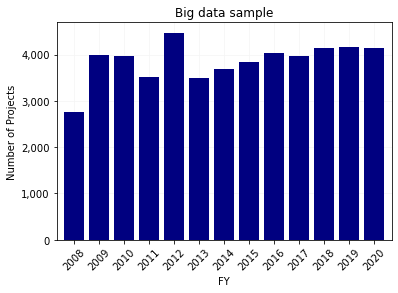

In [32]:
# Distribution over time and agencies
df_bigdata["FY"] = df_bigdata["FY"].astype('int')
year_counts = df_bigdata['FY'].value_counts().sort_index(ascending=True)

# Distribution
year = year_counts.index.tolist()
count = year_counts.values

fig = plt2.figure()
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
plt2.grid(True, color = "whitesmoke")
plt2.bar(year, count, color='navy')
#plt.xlim(-0.7, len(year)-0.3)
plt2.xlim(2007.3,2020.7)
plt2.xticks(year, rotation=45)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
#x_ticks = ax.xaxis.get_major_ticks()
#x_ticks[-1].label1.set_visible(False)
plt2.xlabel("FY")
plt2.ylabel("Number of Projects")
plt2.title("Big data sample")

plt2.savefig("big_data_time.png", dpi = 800, bbox_inches = "tight")

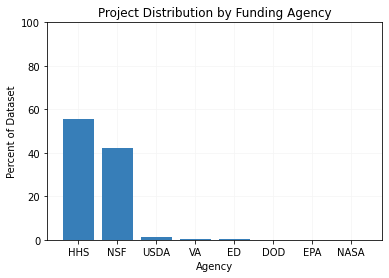

In [33]:
agency_counts = 100*df_bigdata["DEPARTMENT"].value_counts()/len(df_bigdata)
agency = agency_counts.index.tolist()
count = agency_counts.values

fig = plt2.figure()
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
plt2.grid(True, color = "whitesmoke")
plt2.bar(agency, count, color=cb_pal['blue'])
plt2.ylim(0,100)
plt2.xlabel("Agency")
plt2.ylabel("Percent of Dataset")
plt2.title("Project Distribution by Funding Agency")

plt2.savefig("big_data_agency.png", dpi = 800, bbox_inches = "tight")

In [34]:
# save the data
#df_bigdata.to_csv("/project/biocomplexity/sdad/projects_data/ncses/prd/Digital_abstract_labelled/doc2vec_method.csv")

## 1.3. SVM

In [48]:
# We run SVM with default parameters provides by Sklearn. We train the model
from sklearn import svm
classifier_svm = svm.SVC()

# cross-validation with 5 folds
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(classifier_svm,X_train_doc2vec,Y_train_doc2vec, scoring='accuracy', cv=cv)
print(scores)
print("Accuracy: %0.2f.   Standard Deviation: %0.2f" % (scores.mean(), scores.std()))

# train model after cross-validation
classifier_svm.fit(X_train_doc2vec,Y_train_doc2vec)

[0.80078125 0.80859375 0.7890625  0.8203125  0.796875  ]
Accuracy: 0.80.   Standard Deviation: 0.01


SVC()

In [49]:
# Predict the classification
Y_pred_doc2vec = classifier_svm.predict(X_test_doc2vec)

In [50]:
# Classifier performance
from sklearn.metrics import classification_report, confusion_matrix

confusion = confusion_matrix(Y_test_doc2vec, Y_pred_doc2vec)
#print(confusion)
print(classification_report(Y_test_doc2vec, Y_pred_doc2vec))

              precision    recall  f1-score   support

    Big-data       0.79      0.76      0.78       139
Non Big-data       0.82      0.85      0.83       181

    accuracy                           0.81       320
   macro avg       0.81      0.80      0.81       320
weighted avg       0.81      0.81      0.81       320



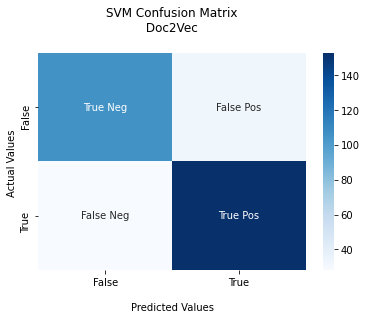

In [51]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues')
ax.set_title('SVM Confusion Matrix\n Doc2Vec \n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt2.savefig('doc2vec_SVM.PNG')
plt2.show()

In [52]:
# Predict the classification for the whole data: use the whole Doc2Vec
Y_doc2vec = classifier_svm.predict(vector)

# The Doc2Vec keep the order from index. Just add the prediction as new variable
df['Prediction_SVM'] = Y_doc2vec
df.head()

,PROJECT_ID,ABSTRACT,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens,index,Prediction_KNN,Prediction_SVM,Prediction_DT
0,89996,"This is a project to explore Game-based, Metap...",Achievement; analog; base; Cognitive Science; ...,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,NSF,NSF,NaN,0814512,9/15/2008,8/31/2012,"REESE, DEBBIE D","CARTER, BEVERLY; WOOD, CHARLES; HITT, BEN",01,068719400,WHEELING JESUIT UNIVERSITY,WHEELING,WV,26003-6243,UNITED STATES,NaN,NaN,47.076,2008,1999467.0,NaN,1,1,1999467.0,1,project explore game base metaphor enhanced ga...,0,Non Big-data,Non Big-data,Big-data
1,89997,Institution: Franklin Institute Science Museum...,Active Learning; Child; Computer software; des...,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,NSF,NSF,NaN,0741659,9/15/2008,8/31/2012,"SNYDER, STEVEN","ELINICH, KAREN; YOON, SUSAN",02,001741859,FRANKLIN INSTITUTE,PHILADELPHIA,PA,19103-1115,UNITED STATES,NaN,NaN,47.076,2008,1799699.0,NaN,1,1,1799699.0,1,institution franklin institute science museum ...,1,Non Big-data,Non Big-data,Big-data
2,89998,Through programs (including small group conver...,Address; Age; Birth; Brain; Caregivers; Child;...,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,NSF,NSF,NaN,0813522,9/15/2008,8/31/2011,"FINK, LAURIE KLEINBAUM","CADIGAN, KAREN; ELLENBOGEN, KIRSTEN",04,061451670,SCIENCE MUSEUM OF MINNESOTA,SAINT PAUL,MN,55102-1202,UNITED STATES,NaN,NaN,47.076,2008,1505858.0,NaN,1,1,1505858.0,1,program include small group conversation citiz...,2,Non Big-data,Non Big-data,Non Big-data
3,89999,In partnership with the American Chemical Soci...,Advanced Development; American; Chemicals; Che...,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,NSF,NSF,NaN,0838627,8/1/2008,12/31/2010,"JOST, JOHN W","MILLER, BRADLEY; BOWMAN, KATHERINE",04,009059242,INTERNATIONAL UNION OF PURE AND APPLIED CHEMISTRY,DURHAM,NC,27709-3757,UNITED STATES,NaN,NaN,47.049,2008,51000.0,NaN,1,1,51000.0,1,partnership american chemical society acs nati...,3,Non Big-data,Non Big-data,Big-data
4,90001,The Center for Molecular Interfacing (CMI) wil...,Address; Architecture; Carbon Nanotubes; Catal...,CCI PHASE I: CENTER FOR MOLECULAR INTERFACING,NSF,NSF,NaN,0847926,10/1/2008,9/30/2011,"ABRUNA, HECTOR D",NaN,22,872612445,CORNELL UNIVERSITY ITHACA,ITHACA,NY,14850-2820,UNITED STATES,NaN,NaN,47.049,2008,1519821.0,NaN,1,1,1519821.0,1,center molecular interfacing cmi enable integr...,4,Non Big-data,Non Big-data,Non Big-data


In [53]:
# Cross comparision between SVM and KNN
pd.crosstab(df['Prediction_KNN'], df['Prediction_SVM'], margins=True, margins_name="Total")

Prediction_SVM,Big-data,Non Big-data,Total
Prediction_KNN,,,
Big-data,36036,14108,50144
Non Big-data,48992,1044733,1093725
Total,85028,1058841,1143869


## 1.4. Decision Tree

In [54]:
# Use default parameters provides by SKLearn and train the model
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier()

# cross-validation with 5 folds
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(classifier_DT,X_train_doc2vec,Y_train_doc2vec, scoring='accuracy', cv=cv)
print(scores)
print("Accuracy: %0.2f.   Standard Deviation: %0.2f" % (scores.mean(), scores.std()))

# train model after cross-validation
classifier_DT.fit(X_train_doc2vec,Y_train_doc2vec)

[0.68359375 0.6328125  0.64453125 0.64453125 0.66015625]
Accuracy: 0.65.   Standard Deviation: 0.02


DecisionTreeClassifier()

In [55]:
# Predict the classification
Y_pred_doc2vec = classifier_DT.predict(X_test_doc2vec)

In [56]:
# Classifier performance
from sklearn.metrics import classification_report, confusion_matrix

confusion = confusion_matrix(Y_test_doc2vec, Y_pred_doc2vec)
#print(confusion)
print(classification_report(Y_test_doc2vec, Y_pred_doc2vec))

              precision    recall  f1-score   support

    Big-data       0.54      0.58      0.56       139
Non Big-data       0.66      0.62      0.64       181

    accuracy                           0.61       320
   macro avg       0.60      0.60      0.60       320
weighted avg       0.61      0.61      0.61       320



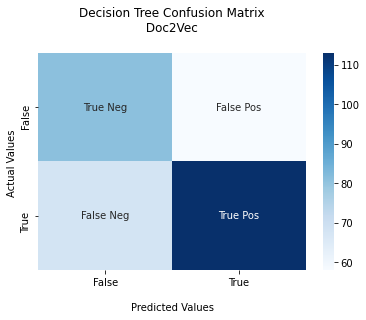

In [57]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues')
ax.set_title('Decision Tree Confusion Matrix\n Doc2Vec \n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt2.savefig('doc2vec_DT.PNG')
plt2.show()

In [58]:
# Predict the classification for the whole data: use the whole Doc2Vec
Y_doc2vec = classifier_DT.predict(vector)

# The Doc2Vec keep the order from index. Just add the prediction as new variable
df['Prediction_DT'] = Y_doc2vec
df.head()

,PROJECT_ID,ABSTRACT,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens,index,Prediction_KNN,Prediction_SVM,Prediction_DT
0,89996,"This is a project to explore Game-based, Metap...",Achievement; analog; base; Cognitive Science; ...,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,NSF,NSF,NaN,0814512,9/15/2008,8/31/2012,"REESE, DEBBIE D","CARTER, BEVERLY; WOOD, CHARLES; HITT, BEN",01,068719400,WHEELING JESUIT UNIVERSITY,WHEELING,WV,26003-6243,UNITED STATES,NaN,NaN,47.076,2008,1999467.0,NaN,1,1,1999467.0,1,project explore game base metaphor enhanced ga...,0,Non Big-data,Non Big-data,Big-data
1,89997,Institution: Franklin Institute Science Museum...,Active Learning; Child; Computer software; des...,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,NSF,NSF,NaN,0741659,9/15/2008,8/31/2012,"SNYDER, STEVEN","ELINICH, KAREN; YOON, SUSAN",02,001741859,FRANKLIN INSTITUTE,PHILADELPHIA,PA,19103-1115,UNITED STATES,NaN,NaN,47.076,2008,1799699.0,NaN,1,1,1799699.0,1,institution franklin institute science museum ...,1,Non Big-data,Non Big-data,Big-data
2,89998,Through programs (including small group conver...,Address; Age; Birth; Brain; Caregivers; Child;...,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,NSF,NSF,NaN,0813522,9/15/2008,8/31/2011,"FINK, LAURIE KLEINBAUM","CADIGAN, KAREN; ELLENBOGEN, KIRSTEN",04,061451670,SCIENCE MUSEUM OF MINNESOTA,SAINT PAUL,MN,55102-1202,UNITED STATES,NaN,NaN,47.076,2008,1505858.0,NaN,1,1,1505858.0,1,program include small group conversation citiz...,2,Non Big-data,Non Big-data,Non Big-data
3,89999,In partnership with the American Chemical Soci...,Advanced Development; American; Chemicals; Che...,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,NSF,NSF,NaN,0838627,8/1/2008,12/31/2010,"JOST, JOHN W","MILLER, BRADLEY; BOWMAN, KATHERINE",04,009059242,INTERNATIONAL UNION OF PURE AND APPLIED CHEMISTRY,DURHAM,NC,27709-3757,UNITED STATES,NaN,NaN,47.049,2008,51000.0,NaN,1,1,51000.0,1,partnership american chemical society acs nati...,3,Non Big-data,Non Big-data,Non Big-data
4,90001,The Center for Molecular Interfacing (CMI) wil...,Address; Architecture; Carbon Nanotubes; Catal...,CCI PHASE I: CENTER FOR MOLECULAR INTERFACING,NSF,NSF,NaN,0847926,10/1/2008,9/30/2011,"ABRUNA, HECTOR D",NaN,22,872612445,CORNELL UNIVERSITY ITHACA,ITHACA,NY,14850-2820,UNITED STATES,NaN,NaN,47.049,2008,1519821.0,NaN,1,1,1519821.0,1,center molecular interfacing cmi enable integr...,4,Non Big-data,Non Big-data,Non Big-data


In [59]:
# Cross comparision between NN and SVM
pd.crosstab(df['Prediction_DT'], df['Prediction_SVM'], margins=True, margins_name="Total")

Prediction_SVM,Big-data,Non Big-data,Total
Prediction_DT,,,
Big-data,47785,287394,335179
Non Big-data,37243,771447,808690
Total,85028,1058841,1143869


In [60]:
# Cross comparision between NN and KNN
pd.crosstab(df['Prediction_DT'], df['Prediction_KNN'], margins=True, margins_name="Total")

Prediction_KNN,Big-data,Non Big-data,Total
Prediction_DT,,,
Big-data,28643,306536,335179
Non Big-data,21501,787189,808690
Total,50144,1093725,1143869


## 1.5. Random Forest

In [61]:
# Use default parameters provides by SKLearn and train the model
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier()

# cross-validation with 5 folds
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(classifier_RF,X_train_doc2vec,Y_train_doc2vec, scoring='accuracy', cv=cv)
print(scores)
print("Accuracy: %0.2f.   Standard Deviation: %0.2f" % (scores.mean(), scores.std()))

# train model after cross-validation
classifier_RF.fit(X_train_doc2vec,Y_train_doc2vec)

[0.796875   0.7890625  0.77734375 0.796875   0.76953125]
Accuracy: 0.79.   Standard Deviation: 0.01


RandomForestClassifier()

In [62]:
# Predict the classification
Y_pred_doc2vec = classifier_RF.predict(X_test_doc2vec)

In [63]:
# Classifier performance
from sklearn.metrics import classification_report, confusion_matrix

confusion = confusion_matrix(Y_test_doc2vec, Y_pred_doc2vec)
#print(confusion)
print(classification_report(Y_test_doc2vec, Y_pred_doc2vec))

              precision    recall  f1-score   support

    Big-data       0.80      0.73      0.76       139
Non Big-data       0.80      0.86      0.83       181

    accuracy                           0.80       320
   macro avg       0.80      0.79      0.80       320
weighted avg       0.80      0.80      0.80       320



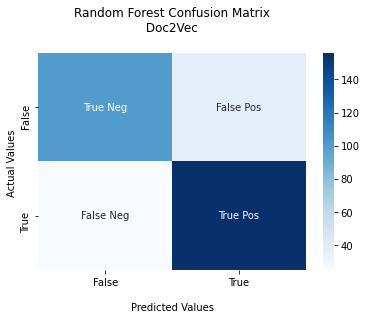

In [64]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues')
ax.set_title('Random Forest Confusion Matrix\n Doc2Vec \n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt2.savefig('doc2vec_RF.PNG')
plt2.show()

In [65]:
# Predict the classification for the whole data: use the whole Doc2Vec
Y_doc2vec = classifier_RF.predict(vector)

# The Doc2Vec keep the order from index. Just add the prediction as new variable
df['Prediction_RF'] = Y_doc2vec
df.head()

,PROJECT_ID,ABSTRACT,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens,index,Prediction_KNN,Prediction_SVM,Prediction_DT,Prediction_RF
0,89996,"This is a project to explore Game-based, Metap...",Achievement; analog; base; Cognitive Science; ...,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,NSF,NSF,NaN,0814512,9/15/2008,8/31/2012,"REESE, DEBBIE D","CARTER, BEVERLY; WOOD, CHARLES; HITT, BEN",01,068719400,WHEELING JESUIT UNIVERSITY,WHEELING,WV,26003-6243,UNITED STATES,NaN,NaN,47.076,2008,1999467.0,NaN,1,1,1999467.0,1,project explore game base metaphor enhanced ga...,0,Non Big-data,Non Big-data,Big-data,Non Big-data
1,89997,Institution: Franklin Institute Science Museum...,Active Learning; Child; Computer software; des...,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,NSF,NSF,NaN,0741659,9/15/2008,8/31/2012,"SNYDER, STEVEN","ELINICH, KAREN; YOON, SUSAN",02,001741859,FRANKLIN INSTITUTE,PHILADELPHIA,PA,19103-1115,UNITED STATES,NaN,NaN,47.076,2008,1799699.0,NaN,1,1,1799699.0,1,institution franklin institute science museum ...,1,Non Big-data,Non Big-data,Big-data,Non Big-data
2,89998,Through programs (including small group conver...,Address; Age; Birth; Brain; Caregivers; Child;...,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,NSF,NSF,NaN,0813522,9/15/2008,8/31/2011,"FINK, LAURIE KLEINBAUM","CADIGAN, KAREN; ELLENBOGEN, KIRSTEN",04,061451670,SCIENCE MUSEUM OF MINNESOTA,SAINT PAUL,MN,55102-1202,UNITED STATES,NaN,NaN,47.076,2008,1505858.0,NaN,1,1,1505858.0,1,program include small group conversation citiz...,2,Non Big-data,Non Big-data,Non Big-data,Non Big-data
3,89999,In partnership with the American Chemical Soci...,Advanced Development; American; Chemicals; Che...,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,NSF,NSF,NaN,0838627,8/1/2008,12/31/2010,"JOST, JOHN W","MILLER, BRADLEY; BOWMAN, KATHERINE",04,009059242,INTERNATIONAL UNION OF PURE AND APPLIED CHEMISTRY,DURHAM,NC,27709-3757,UNITED STATES,NaN,NaN,47.049,2008,51000.0,NaN,1,1,51000.0,1,partnership american chemical society acs nati...,3,Non Big-data,Non Big-data,Non Big-data,Non Big-data
4,90001,The Center for Molecular Interfacing (CMI) wil...,Address; Architecture; Carbon Nanotubes; Catal...,CCI PHASE I: CENTER FOR MOLECULAR INTERFACING,NSF,NSF,NaN,0847926,10/1/2008,9/30/2011,"ABRUNA, HECTOR D",NaN,22,872612445,CORNELL UNIVERSITY ITHACA,ITHACA,NY,14850-2820,UNITED STATES,NaN,NaN,47.049,2008,1519821.0,NaN,1,1,1519821.0,1,center molecular interfacing cmi enable integr...,4,Non Big-data,Non Big-data,Non Big-data,Non Big-data


In [66]:
# Cross comparision between RF and DT
pd.crosstab(df['Prediction_RF'], df['Prediction_DT'], margins=True, margins_name="Total")

Prediction_DT,Big-data,Non Big-data,Total
Prediction_RF,,,
Big-data,44977,30542,75519
Non Big-data,290202,778148,1068350
Total,335179,808690,1143869


In [67]:
# Cross comparision between RF and SVM
pd.crosstab(df['Prediction_RF'], df['Prediction_SVM'], margins=True, margins_name="Total")

Prediction_SVM,Big-data,Non Big-data,Total
Prediction_RF,,,
Big-data,52869,22650,75519
Non Big-data,32159,1036191,1068350
Total,85028,1058841,1143869


In [68]:
# Cross comparision between RF and SVM
pd.crosstab(df['Prediction_RF'], df['Prediction_KNN'], margins=True, margins_name="Total")

Prediction_KNN,Big-data,Non Big-data,Total
Prediction_RF,,,
Big-data,33579,41940,75519
Non Big-data,16565,1051785,1068350
Total,50144,1093725,1143869


## 1.6. Neural network classifier

In [69]:
# Use default parameters provides by SKLearn and train the model
from sklearn.neural_network import MLPClassifier
classifier_nn = MLPClassifier()

# cross-validation with 5 folds
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(classifier_nn,X_train_doc2vec,Y_train_doc2vec, scoring='accuracy', cv=cv)
print(scores)
print("Accuracy: %0.2f.   Standard Deviation: %0.2f" % (scores.mean(), scores.std()))

# train model after cross-validation
classifier_nn.fit(X_train_doc2vec,Y_train_doc2vec)

/apps/software/standard/core/anaconda/2020.11-py3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/apps/software/standard/core/anaconda/2020.11-py3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/apps/software/standard/core/anaconda/2020.11-py3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/apps/software/standard/core/anaconda/2020.11-py3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[0.796875   0.76953125 0.76171875 0.78515625 0.7734375 ]
Accuracy: 0.78.   Standard Deviation: 0.01


MLPClassifier()

In [70]:
# Predict the classification
Y_pred_doc2vec = classifier_nn.predict(X_test_doc2vec)

In [71]:
# Classifier performance
from sklearn.metrics import classification_report, confusion_matrix

confusion = confusion_matrix(Y_test_doc2vec, Y_pred_doc2vec)
#print(confusion)
print(classification_report(Y_test_doc2vec, Y_pred_doc2vec))

              precision    recall  f1-score   support

    Big-data       0.75      0.71      0.73       139
Non Big-data       0.79      0.82      0.80       181

    accuracy                           0.77       320
   macro avg       0.77      0.76      0.77       320
weighted avg       0.77      0.77      0.77       320



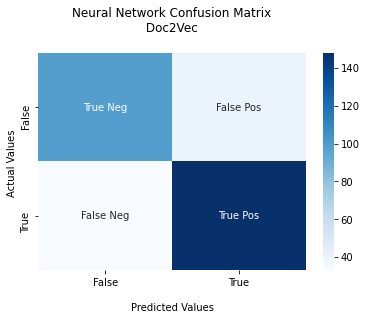

In [72]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues')
ax.set_title('Neural Network Confusion Matrix\n Doc2Vec \n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt2.savefig('doc2vec_NN.PNG')
plt2.show()

In [73]:
# Predict the classification for the whole data: use the whole Doc2Vec
Y_doc2vec = classifier_nn.predict(vector)

# The Doc2Vec keep the order from index. Just add the prediction as new variable
df['Prediction_NN'] = Y_doc2vec
df.head()

,PROJECT_ID,ABSTRACT,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens,index,Prediction_KNN,Prediction_SVM,Prediction_DT,Prediction_RF,Prediction_NN
0,89996,"This is a project to explore Game-based, Metap...",Achievement; analog; base; Cognitive Science; ...,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,NSF,NSF,NaN,0814512,9/15/2008,8/31/2012,"REESE, DEBBIE D","CARTER, BEVERLY; WOOD, CHARLES; HITT, BEN",01,068719400,WHEELING JESUIT UNIVERSITY,WHEELING,WV,26003-6243,UNITED STATES,NaN,NaN,47.076,2008,1999467.0,NaN,1,1,1999467.0,1,project explore game base metaphor enhanced ga...,0,Non Big-data,Non Big-data,Big-data,Non Big-data,Non Big-data
1,89997,Institution: Franklin Institute Science Museum...,Active Learning; Child; Computer software; des...,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,NSF,NSF,NaN,0741659,9/15/2008,8/31/2012,"SNYDER, STEVEN","ELINICH, KAREN; YOON, SUSAN",02,001741859,FRANKLIN INSTITUTE,PHILADELPHIA,PA,19103-1115,UNITED STATES,NaN,NaN,47.076,2008,1799699.0,NaN,1,1,1799699.0,1,institution franklin institute science museum ...,1,Non Big-data,Non Big-data,Big-data,Non Big-data,Non Big-data
2,89998,Through programs (including small group conver...,Address; Age; Birth; Brain; Caregivers; Child;...,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,NSF,NSF,NaN,0813522,9/15/2008,8/31/2011,"FINK, LAURIE KLEINBAUM","CADIGAN, KAREN; ELLENBOGEN, KIRSTEN",04,061451670,SCIENCE MUSEUM OF MINNESOTA,SAINT PAUL,MN,55102-1202,UNITED STATES,NaN,NaN,47.076,2008,1505858.0,NaN,1,1,1505858.0,1,program include small group conversation citiz...,2,Non Big-data,Non Big-data,Non Big-data,Non Big-data,Non Big-data
3,89999,In partnership with the American Chemical Soci...,Advanced Development; American; Chemicals; Che...,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,NSF,NSF,NaN,0838627,8/1/2008,12/31/2010,"JOST, JOHN W","MILLER, BRADLEY; BOWMAN, KATHERINE",04,009059242,INTERNATIONAL UNION OF PURE AND APPLIED CHEMISTRY,DURHAM,NC,27709-3757,UNITED STATES,NaN,NaN,47.049,2008,51000.0,NaN,1,1,51000.0,1,partnership american chemical society acs nati...,3,Non Big-data,Non Big-data,Non Big-data,Non Big-data,Non Big-data
4,90001,The Center for Molecular Interfacing (CMI) wil...,Address; Architecture; Carbon Nanotubes; Catal...,CCI PHASE I: CENTER FOR MOLECULAR INTERFACING,NSF,NSF,NaN,0847926,10/1/2008,9/30/2011,"ABRUNA, HECTOR D",NaN,22,872612445,CORNELL UNIVERSITY ITHACA,ITHACA,NY,14850-2820,UNITED STATES,NaN,NaN,47.049,2008,1519821.0,NaN,1,1,1519821.0,1,center molecular interfacing cmi enable integr...,4,Non Big-data,Non Big-data,Non Big-data,Non Big-data,Non Big-data


In [74]:
# Cross comparision between NN and KNN
pd.crosstab(df['Prediction_NN'], df['Prediction_KNN'], margins=True, margins_name="Total")

Prediction_KNN,Big-data,Non Big-data,Total
Prediction_NN,,,
Big-data,34779,97964,132743
Non Big-data,15365,995761,1011126
Total,50144,1093725,1143869


In [75]:
# Cross comparision between NN and SVM
pd.crosstab(df['Prediction_NN'], df['Prediction_SVM'], margins=True, margins_name="Total")

Prediction_SVM,Big-data,Non Big-data,Total
Prediction_NN,,,
Big-data,69890,62853,132743
Non Big-data,15138,995988,1011126
Total,85028,1058841,1143869


In [76]:
# Cross comparision between NN and DT
pd.crosstab(df['Prediction_NN'], df['Prediction_DT'], margins=True, margins_name="Total")

Prediction_DT,Big-data,Non Big-data,Total
Prediction_NN,,,
Big-data,65528,67215,132743
Non Big-data,269651,741475,1011126
Total,335179,808690,1143869


In [77]:
# Cross comparision between NN and RF
pd.crosstab(df['Prediction_NN'], df['Prediction_RF'], margins=True, margins_name="Total")

Prediction_RF,Big-data,Non Big-data,Total
Prediction_NN,,,
Big-data,51255,81488,132743
Non Big-data,24264,986862,1011126
Total,75519,1068350,1143869


In [78]:
# save the data
df.to_csv("/project/biocomplexity/sdad/projects_data/ncses/prd/Digital_abstract_labelled/FR_final_predicted_doc2vec.csv")

## 1.7. Decision rule based on all classifiers

In [79]:
# Compute a score to be identify as big data
df = pd.read_csv("/project/biocomplexity/sdad/projects_data/ncses/prd/Digital_abstract_labelled/FR_final_predicted_doc2vec.csv")
df['score'] = np.where(df['Prediction_KNN'].str.contains("Non Big-data"), 0, 1) + np.where(df['Prediction_SVM'].str.contains("Non Big-data"), 0, 1) + np.where(df['Prediction_DT'].str.contains("Non Big-data"), 0, 1) + np.where(df['Prediction_RF'].str.contains("Non Big-data"), 0, 1) + np.where(df['Prediction_NN'].str.contains("Non Big-data"), 0, 1)

/apps/software/standard/core/anaconda/2020.11-py3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3,7,8,11,12,13,14,16,17,18,19,20,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [80]:
df.head()

,Unnamed: 0,PROJECT_ID,ABSTRACT,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens,index,Prediction_KNN,Prediction_SVM,Prediction_DT,Prediction_RF,Prediction_NN,score
0,0,89996,"This is a project to explore Game-based, Metap...",Achievement; analog; base; Cognitive Science; ...,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,NSF,NSF,NaN,0814512,9/15/2008,8/31/2012,"REESE, DEBBIE D","CARTER, BEVERLY; WOOD, CHARLES; HITT, BEN",1,068719400,WHEELING JESUIT UNIVERSITY,WHEELING,WV,26003-6243,UNITED STATES,NaN,NaN,47.076,2008,1999467.0,NaN,1,1,1999467.0,1,project explore game base metaphor enhanced ga...,0,Non Big-data,Non Big-data,Big-data,Non Big-data,Non Big-data,1
1,1,89997,Institution: Franklin Institute Science Museum...,Active Learning; Child; Computer software; des...,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,NSF,NSF,NaN,0741659,9/15/2008,8/31/2012,"SNYDER, STEVEN","ELINICH, KAREN; YOON, SUSAN",2,001741859,FRANKLIN INSTITUTE,PHILADELPHIA,PA,19103-1115,UNITED STATES,NaN,NaN,47.076,2008,1799699.0,NaN,1,1,1799699.0,1,institution franklin institute science museum ...,1,Non Big-data,Non Big-data,Big-data,Non Big-data,Non Big-data,1
2,2,89998,Through programs (including small group conver...,Address; Age; Birth; Brain; Caregivers; Child;...,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,NSF,NSF,NaN,0813522,9/15/2008,8/31/2011,"FINK, LAURIE KLEINBAUM","CADIGAN, KAREN; ELLENBOGEN, KIRSTEN",4,061451670,SCIENCE MUSEUM OF MINNESOTA,SAINT PAUL,MN,55102-1202,UNITED STATES,NaN,NaN,47.076,2008,1505858.0,NaN,1,1,1505858.0,1,program include small group conversation citiz...,2,Non Big-data,Non Big-data,Non Big-data,Non Big-data,Non Big-data,0
3,3,89999,In partnership with the American Chemical Soci...,Advanced Development; American; Chemicals; Che...,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,NSF,NSF,NaN,0838627,8/1/2008,12/31/2010,"JOST, JOHN W","MILLER, BRADLEY; BOWMAN, KATHERINE",4,009059242,INTERNATIONAL UNION OF PURE AND APPLIED CHEMISTRY,DURHAM,NC,27709-3757,UNITED STATES,NaN,NaN,47.049,2008,51000.0,NaN,1,1,51000.0,1,partnership american chemical society acs nati...,3,Non Big-data,Non Big-data,Non Big-data,Non Big-data,Non Big-data,0
4,4,90001,The Center for Molecular Interfacing (CMI) wil...,Address; Architecture; Carbon Nanotubes; Catal...,CCI PHASE I: CENTER FOR MOLECULAR INTERFACING,NSF,NSF,NaN,0847926,10/1/2008,9/30/2011,"ABRUNA, HECTOR D",NaN,22,872612445,CORNELL UNIVERSITY ITHACA,ITHACA,NY,14850-2820,UNITED STATES,NaN,NaN,47.049,2008,1519821.0,NaN,1,1,1519821.0,1,center molecular interfacing cmi enable integr...,4,Non Big-data,Non Big-data,Non Big-data,Non Big-data,Non Big-data,0


In [81]:
# Distribution of abstracts
df['score'].value_counts()

0    721246
1    298547
2     52362
3     28751
4     25726
5     17237
Name: score, dtype: int64

In [82]:
# Used a rule (majority votes from classifiers) to identify Big-data abstracts. Useful because we have an impair number of classifier
df['Big_data'] = 0
df.loc[df['score']>3,'Big_data'] = 1
df['Big_data'].value_counts()

0    1100906
1      42963
Name: Big_data, dtype: int64

In [83]:
# subset the data to big-data and save
#df_bigdata = df[df['Big_data']==1]
#df_bigdata.to_csv("/project/biocomplexity/sdad/projects_data/ncses/prd/Digital_abstract_labelled/abstracts_classification_big_data_doc2vec.csv")

## Descriptive statistics of our Big data

<ipython-input-84-f8d200ebecbf>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])


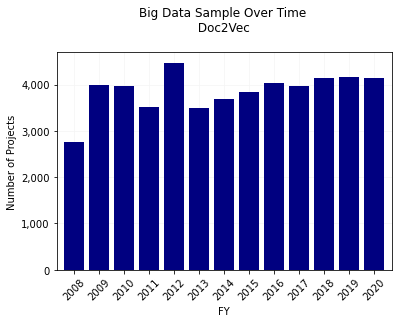

In [84]:
# Distribution over time and agencies
df_bigdata["FY"] = df_bigdata["FY"].astype('int')
year_counts = df_bigdata['FY'].value_counts().sort_index(ascending=True)

# Distribution
year = year_counts.index.tolist()
count = year_counts.values

fig = plt2.figure()
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
plt2.grid(True, color = "whitesmoke")
plt2.bar(year, count, color='navy')
#plt.xlim(-0.7, len(year)-0.3)
plt2.xlim(2007.3,2020.7)
plt2.xticks(year, rotation=45)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
#x_ticks = ax.xaxis.get_major_ticks()
#x_ticks[-1].label1.set_visible(False)
plt2.xlabel("FY")
plt2.ylabel("Number of Projects")
plt2.title("Big Data Sample Over Time \n Doc2Vec \n")

plt2.savefig("D2v_big_data_time.png", dpi = 800, bbox_inches = "tight")

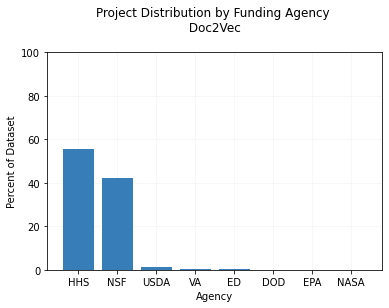

In [85]:
agency_counts = 100*df_bigdata["DEPARTMENT"].value_counts()/len(df_bigdata)
agency = agency_counts.index.tolist()
count = agency_counts.values

fig = plt2.figure()
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
plt2.grid(True, color = "whitesmoke")
plt2.bar(agency, count, color=cb_pal['blue'])
plt2.ylim(0,100)
plt2.xlabel("Agency")
plt2.ylabel("Percent of Dataset")
plt2.title("Project Distribution by Funding Agency \n Doc2Vec \n")

plt2.savefig("D2v_big_data_agency.png", dpi = 800, bbox_inches = "tight")